In [1]:
import sys
ipython = get_ipython()

def hide_traceback(exc_tuple=None, filename=None, tb_offset=None,
                   exception_only=False, running_compiled_code=False):
    etype, value, tb = sys.exc_info()
    return ipython._showtraceback(etype, value, ipython.InteractiveTB.get_exception_only(etype, value))

ipython.showtraceback = hide_traceback

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams.update({'font.size': 16, 'font.family': 'STIXGeneral', 'mathtext.fontset': 'cm'})


# Suites numériques - Généralités

Une suite $(u_n)$ est une liste ordonnée de nombres réels : à chaque entier $n$, on fait correspondre le terme $u_n$ qui se lit "$u$ indice $n$".  
Pour désigner $u_n$, on parle du *terme général* de la suite ou bien du terme de *rang* $n$ ou encore du terme *d'indice* $n$.

**Remarque** : On peut voir la suite $(u_n)$ comme une fonction :
\begin{align*}u :\ &\mathbb{N} \rightarrow \mathbb{R} \\ &n \mapsto u(n)=u_n\end{align*}

## Différentes manière de définir une suite

### De manière explicite
Une formule permet de calculer $u_n$ en fonction de $n$.

**Exemple** : Pour tout $n\in\mathbb{N}$, $u_n=n^2-3n+2$.

Pour calculer $u_{10}$, on remplace $n$ par $10$ : $u_{10}=10^2-3\times10+2=100-30+2=72$.

In [2]:
def u(n):
    assert type(n)==int and n>=0, "La suite n'est définie que pour des entiers positifs"
    return n**2 - 3*n + 2

u(10)

72

### Avec une relation de récurrence
On donne le premier terme ainsi qu'une méthode qui, connaissant un terme, permet de calculer le terme suivant.  
Ainsi, chaque terme s'obtient en fonction du précédent.

**Exemple** : La suite $(v_n)$ a pour terme initial $v_0=1$ et la relation de récurrence est : $v_{n+1}=v_n+2$ pour tout $n\in\mathbb{N}$.

Pour calculer $v_{4}$, il faut d'abord connaître $v_3$, mais pour utiliser $v_3$, il faut calculer $v_2$, etc.

$v_1=v_0+2=1+2=3$  
$v_2=v_1+2=3+2=5$  
$v_3=v_2+2=5+2=7$  
$v_4=v_3+2=7+2=9$  

In [3]:
def v(n):                   # /!\ En informatique on travaille avec 'n' et 'n-1'
    assert type(n)==int and n>=0, \
        "La suite n'est définie que pour des entiers positifs"
    if n==0:           
        return 1       
    else:                   # Une fonction qui fait référence à elle-même
        return v(n-1) + 2   # s'appelle une fonction récursive
    
v(4)

9

### Représentation
On peut représenter les termes d'une suite à l'aide d'un *nuage de points*. C'est-à-dire que l'on va représenter les points $(n,u_n)$ où les indices sont en abscisse et les valeurs de la suite en ordonnée.

**Exemple** : Soit $(u_n)$ définie par $u_n=n(n-4)+4$. Calculer puis représenter les 6 premiers termes.


In [4]:
def u(n):
    assert type(n) == int and n >= 0, "La suite n'est définie que pour des entiers positifs"
    return n*(n - 4) + 4

for i in range(6):
    print("u_{n} = {un}".format(n=i, un=u(i)))

u_0 = 4
u_1 = 1
u_2 = 0
u_3 = 1
u_4 = 4
u_5 = 9


Les 6 premières valeurs de la suite sont :

|$n$  | $u_n$ |
|:---:|:-----:|
|  0  |   4   |
|  1  |   1   |
|  2  |   0   |
|  3  |   1   |
|  4  |   4   |
|  5  |   9   |

Nous allons représenter ces valeurs dans un graphique où les $n$ sont en abscisses et les $u_n$ en ordonnées.

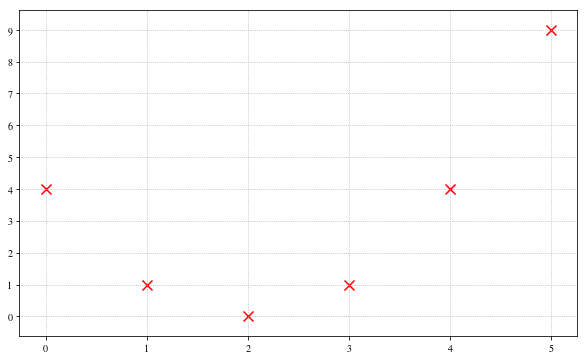

In [5]:
import matplotlib.pyplot as plt

abscisses = list(range(6))
ordonnees = [u(n) for n in abscisses]

plt.figure(figsize=(10, 6))
plt.yticks(range(11))
plt.grid(ls=':')
plt.scatter(abscisses, ordonnees, s=100, c='red', marker='x')
plt.show()

## Sens de variation
Pour une suite $(u_n)$, on dira que la suite est :
* croissante si pour tout entier $n$, $u_{n+1}\geqslant u_n$.
* décroissante si pour tout entier $n$, $u_{n+1}\leqslant u_n$.
<br><br>
* croissante à partir du rang $N$ si pour tout entier $n\geqslant N$, $u_{n+1}\geqslant u_n$.
* décroissante à partir du rang $N$ si pour tout entier $n\geqslant N$, $u_{n+1}\leqslant u_n$.

### Montrer qu'une suite est croissante ou décroissante : méthode n°1
Soit $(u_n)$ la suite définie par récurrence par $u_0=10$ et pour tout entier $n$ : $u_{n+1}=u_n-7$.

On calcule la différence $u_{n+1}-u_n$ :

$$u_{n+1}-u_n=(u_n-7)-u_n=-7\leqslant 0$$

La suite $(u_n)$ est donc décroissante.

### Montrer qu'une suite est croissante ou décroissante : méthode n°2
Soit $(u_n)$ une suite numérique dont les termes sont tous strictement positifs.

Puisque tous les termes de la suite sont **_strictement positifs_**, on peut calculer le quotient $\dfrac{u_{n+1}}{u_n}$ qui sera lui-même strictement positif :
* si pour tout entier $n$, $\dfrac{u_{n+1}}{u_n}\geqslant 1$, alors la suite $(u_n)$ est croissante.
* si pour tout entier $n$, $\dfrac{u_{n+1}}{u_n}\leqslant 1$, alors la suite $(u_n)$ est décroissante.

**Exemple** : Soit $(u_n)$ la suite définie par récurrence par $u_0=1$ et pour tout entier $n$ : $u_{n+1}=2\times u_n$. On admet que les termes de cette suite sont tous strictement positifs.

$$\dfrac{u_{n+1}}{u_n}=\dfrac{2\times u_n}{u_n}=2\geqslant 1$$

La suite $(u_n)$ est donc croissante.

### Montrer qu'une suite est croissante ou décroissante : méthode n°3
Soit la suite $(u_n)$ définie explicitement par $u_n=f(n)$ pour tout entier $n$.
Si la fonction $f$ est monotone sur $\left[0;+\infty\right[$ alors la suite a le même sens de variation que $f$.

**Exemple** : Soit $(u_n)$ la suite définie pour tout entier $n$ par $u_n=n^2$.

La suite est définie de manière explicite par $u_n=f(n)$ où $f$ est la fonction définie sur $\mathbb{R}$ par $f(x)=x^2$.

Or la fonction $f$ est croissante sur $\mathbb{R}^{+}$. La suite $(u_n)$ est donc croissante.